**Prboelm Statement**:
  Perceptron model on dataset and  
  1. Preprocess the data with standarization
  2. Predict the output with model
  3. Find the final weight of the input vector
  4. Detect the most dominent feature

**Diabetes Dataset**

 First 5 rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



 Processed data sample:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1



 Accuracy: 0.7272727272727273

 Confusion Matrix:
 [[76 23]
 [19 36]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.77      0.78        99
           1       0.61      0.65      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154


 Weights: [[-0.04575225  0.18784573  0.24722499  0.15396901 -0.0208418   0.26349419
   0.05684826 -0.07121647]]
 Bias: [-0.2]


/tmp/ipython-input-3149558279.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target, data=data, palette='viridis')


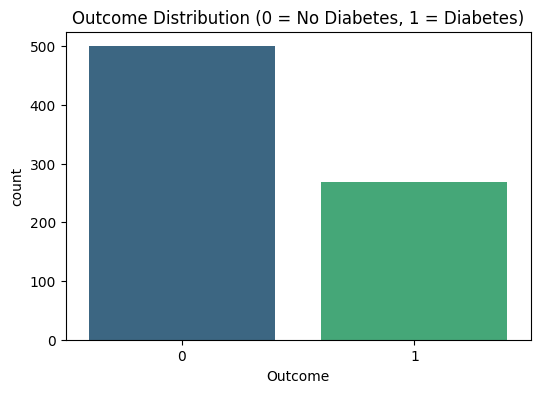

/tmp/ipython-input-3149558279.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=feature_names, palette='mako')


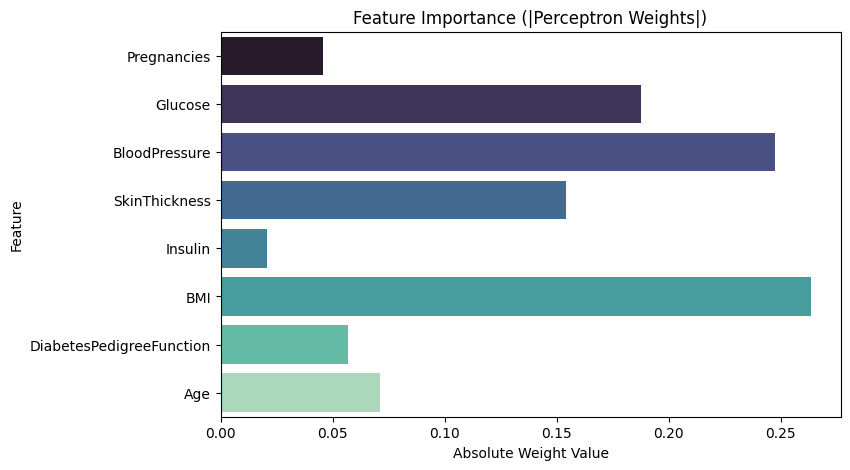

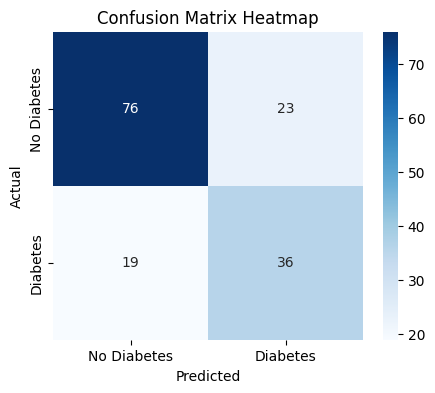

Most dominant feature: BMI


In [11]:
# @title
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load Dataset
data = pd.read_csv("diabetes.csv")
print(" First 5 rows:")
display(data.head())

# 2. Select features and target
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
            'BMI', 'DiabetesPedigreeFunction', 'Age']
target = 'Outcome'
data = data[features + [target]]

# 3. Handle Missing Values (replace 0s in some columns with mean where appropriate)
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    data[col] = data[col].replace(0, np.nan)
    data[col] = data[col].fillna(data[col].mean())

print("\n Processed data sample:")
display(data.head())

# 4. Feature-Target Split
X = data.drop(target, axis=1)
y = data[target]

# 5. Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7. Initialize & Train Perceptron
clf = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
clf.fit(X_train, y_train)

# 8. Predictions
y_pred = clf.predict(X_test)

# 9. Model Evaluation
print("\n Accuracy:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Weights:", clf.coef_)
print(" Bias:", clf.intercept_)

# 10. Visualization: Target Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=target, data=data, palette='viridis')
plt.title("Outcome Distribution (0 = No Diabetes, 1 = Diabetes)")
plt.show()

# 11. Visualization: Feature Importance (Absolute Weights)
importance = np.abs(clf.coef_[0])
feature_names = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importance, y=feature_names, palette='mako')
plt.title("Feature Importance (|Perceptron Weights|)")
plt.xlabel("Absolute Weight Value")
plt.ylabel("Feature")
plt.show()

# 12. Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes','Diabetes'], yticklabels=['No Diabetes','Diabetes'])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#13. Most Dominent Feature
importance = np.abs(clf.coef_[0])
feature_names = X.columns
dominant_feature = feature_names[np.argmax(importance)]
print("Most dominant feature:", dominant_feature)

**Test Dataset**

First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



 Processed data sample:


,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,False,True
1,1,1,38.0,1,0,71.2833,1,False,False
2,3,1,26.0,0,0,7.9250,1,False,True
3,1,1,35.0,1,0,53.1000,1,False,True
4,3,0,35.0,0,0,8.0500,0,False,True



 Accuracy: 0.7150837988826816

 Confusion Matrix:
 [[70 35]
 [16 58]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.67      0.73       105
           1       0.62      0.78      0.69        74

    accuracy                           0.72       179
   macro avg       0.72      0.73      0.71       179
weighted avg       0.74      0.72      0.72       179


 Weights: [[ 0.08130337  0.34855581 -0.22706908  0.03799232 -0.04793416  0.2596027
  -0.03033555 -0.39680774]]
 Bias: [0.1]


/tmp/ipython-input-1814581900.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=data, palette='viridis')


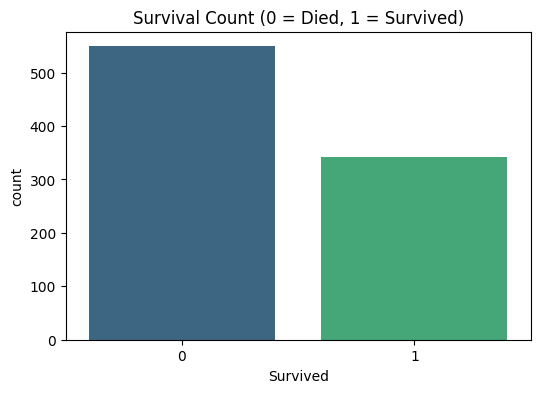

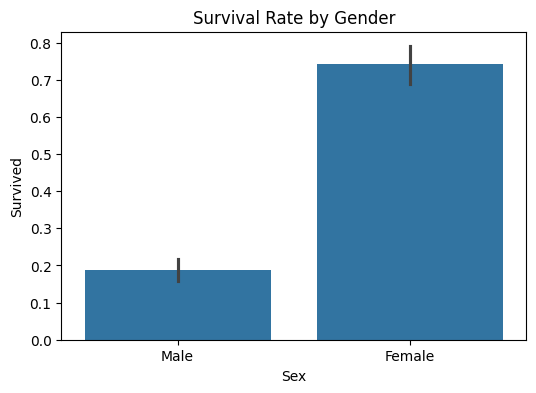

/tmp/ipython-input-1814581900.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=feature_names, palette='mako')


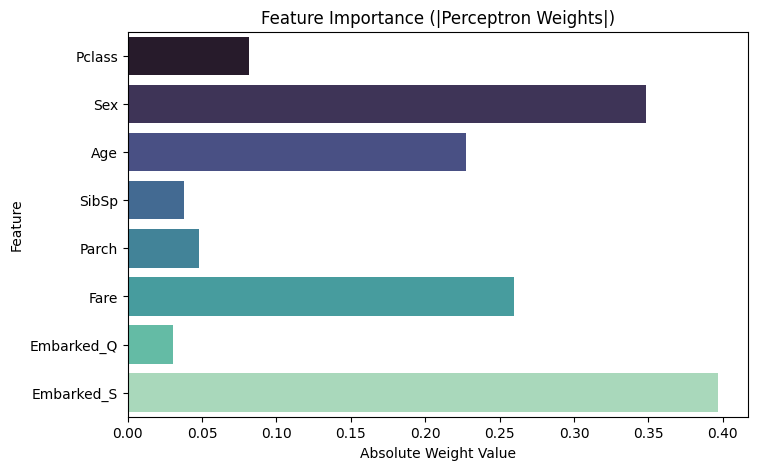

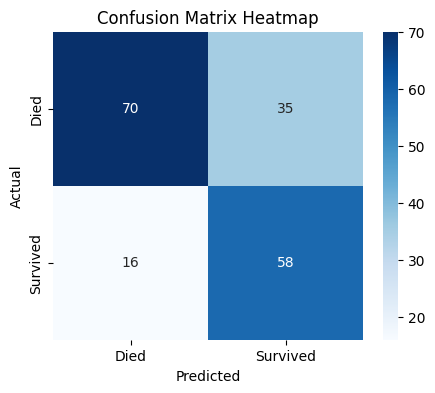

Most dominant feature: Embarked_S


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load Dataset
data = pd.read_csv("train.csv")
print("First 5 rows:")
display(data.head())

# 2. Select useful features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'
data = data[features + [target]]

# 3. Handle Missing Values
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# 4. Convert Categorical Variables to Numeric
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

print("\n Processed data sample:")
display(data.head())

# 5. Feature-Target Split
X = data.drop('Survived', axis=1)
y = data['Survived']

# 6. Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Standardize Features (very important for Perceptron convergence)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 8. Initialize & Train Perceptron
clf = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
clf.fit(X_train, y_train)

# 9. Predictions
y_pred = clf.predict(X_test)

# 10. Model Evaluation
print("\n Accuracy:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Weights:", clf.coef_)
print(" Bias:", clf.intercept_)

#  11. Survival Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=data, palette='viridis')
plt.title("Survival Count (0 = Died, 1 = Survived)")
plt.show()

#  12. Survival by Gender
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=data)
plt.title("Survival Rate by Gender")
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

# 13. Feature Importance Visualization (Absolute Weight Values)
importance = np.abs(clf.coef_[0])
feature_names = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importance, y=feature_names, palette='mako')
plt.title("Feature Importance (|Perceptron Weights|)")
plt.xlabel("Absolute Weight Value")
plt.ylabel("Feature")
plt.show()

# 14. Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Died','Survived'], yticklabels=['Died','Survived'])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 15. Most Dominent Feature
importance = np.abs(clf.coef_[0])
feature_names = X.columns
dominant_feature = feature_names[np.argmax(importance)]
print("Most dominant feature:", dominant_feature)